In [14]:
import datasets
import os
from PIL import Image
import json
import cv2
import numpy as np

import sys

sys.path.append("/home/aihao/workspace")
from anime_segmentation.train import AnimeSegmentation
from anime_segmentation.inference import get_mask

In [15]:
image_path = "/home/aihao/workspace/StableDiffusionReferenceOnly/validation_images/1/2_origin.jpg"
save_path = (
    "/home/aihao/workspace/StableDiffusionReferenceOnly/validation_images/1/2.jpg"
)

In [2]:
anime_segmentation_model = AnimeSegmentation.try_load(
    "isnet_is",
    "/home/aihao/workspace/DeepLearningContent/models/anime-seg/isnetis.ckpt",
    "cuda",
    img_size=1024,
)
anime_segmentation_model.eval()

AnimeSegmentation(
  (net): ISNetDIS(
    (conv_in): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (pool_in): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
    (stage1): RSU7(
      (rebnconvin): REBNCONV(
        (conv_s1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (bn_s1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu_s1): ReLU(inplace=True)
      )
      (rebnconv1): REBNCONV(
        (conv_s1): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (bn_s1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu_s1): ReLU(inplace=True)
      )
      (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
      (rebnconv2): REBNCONV(
        (conv_s1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (bn_s1): BatchNorm2d(32, eps=1e-05, momentum=0.

In [16]:
def anime_seg(image_path):
    img = cv2.cvtColor(cv2.imread(image_path, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
    mask = get_mask(
        anime_segmentation_model,
        img,
        use_amp=False,
        s=1024,
    )
    img = np.concatenate((mask * img + 1 - mask, mask * 255), axis=2).astype(np.uint8)
    return img

In [17]:
result = anime_seg(image_path)

In [18]:
image_gray = cv2.cvtColor(result, cv2.COLOR_RGBA2GRAY)
image_gray

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [19]:
image_gray = cv2.adaptiveThreshold(
    image_gray,
    255,
    cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY,
    blockSize=5,
    C=7,
)

In [22]:
Image.fromarray(image_gray).convert("RGB") == Image.open(
    "/home/aihao/workspace/StableDiffusionReferenceOnly/validation_images/1/2.jpg"
).convert("RGB")

False

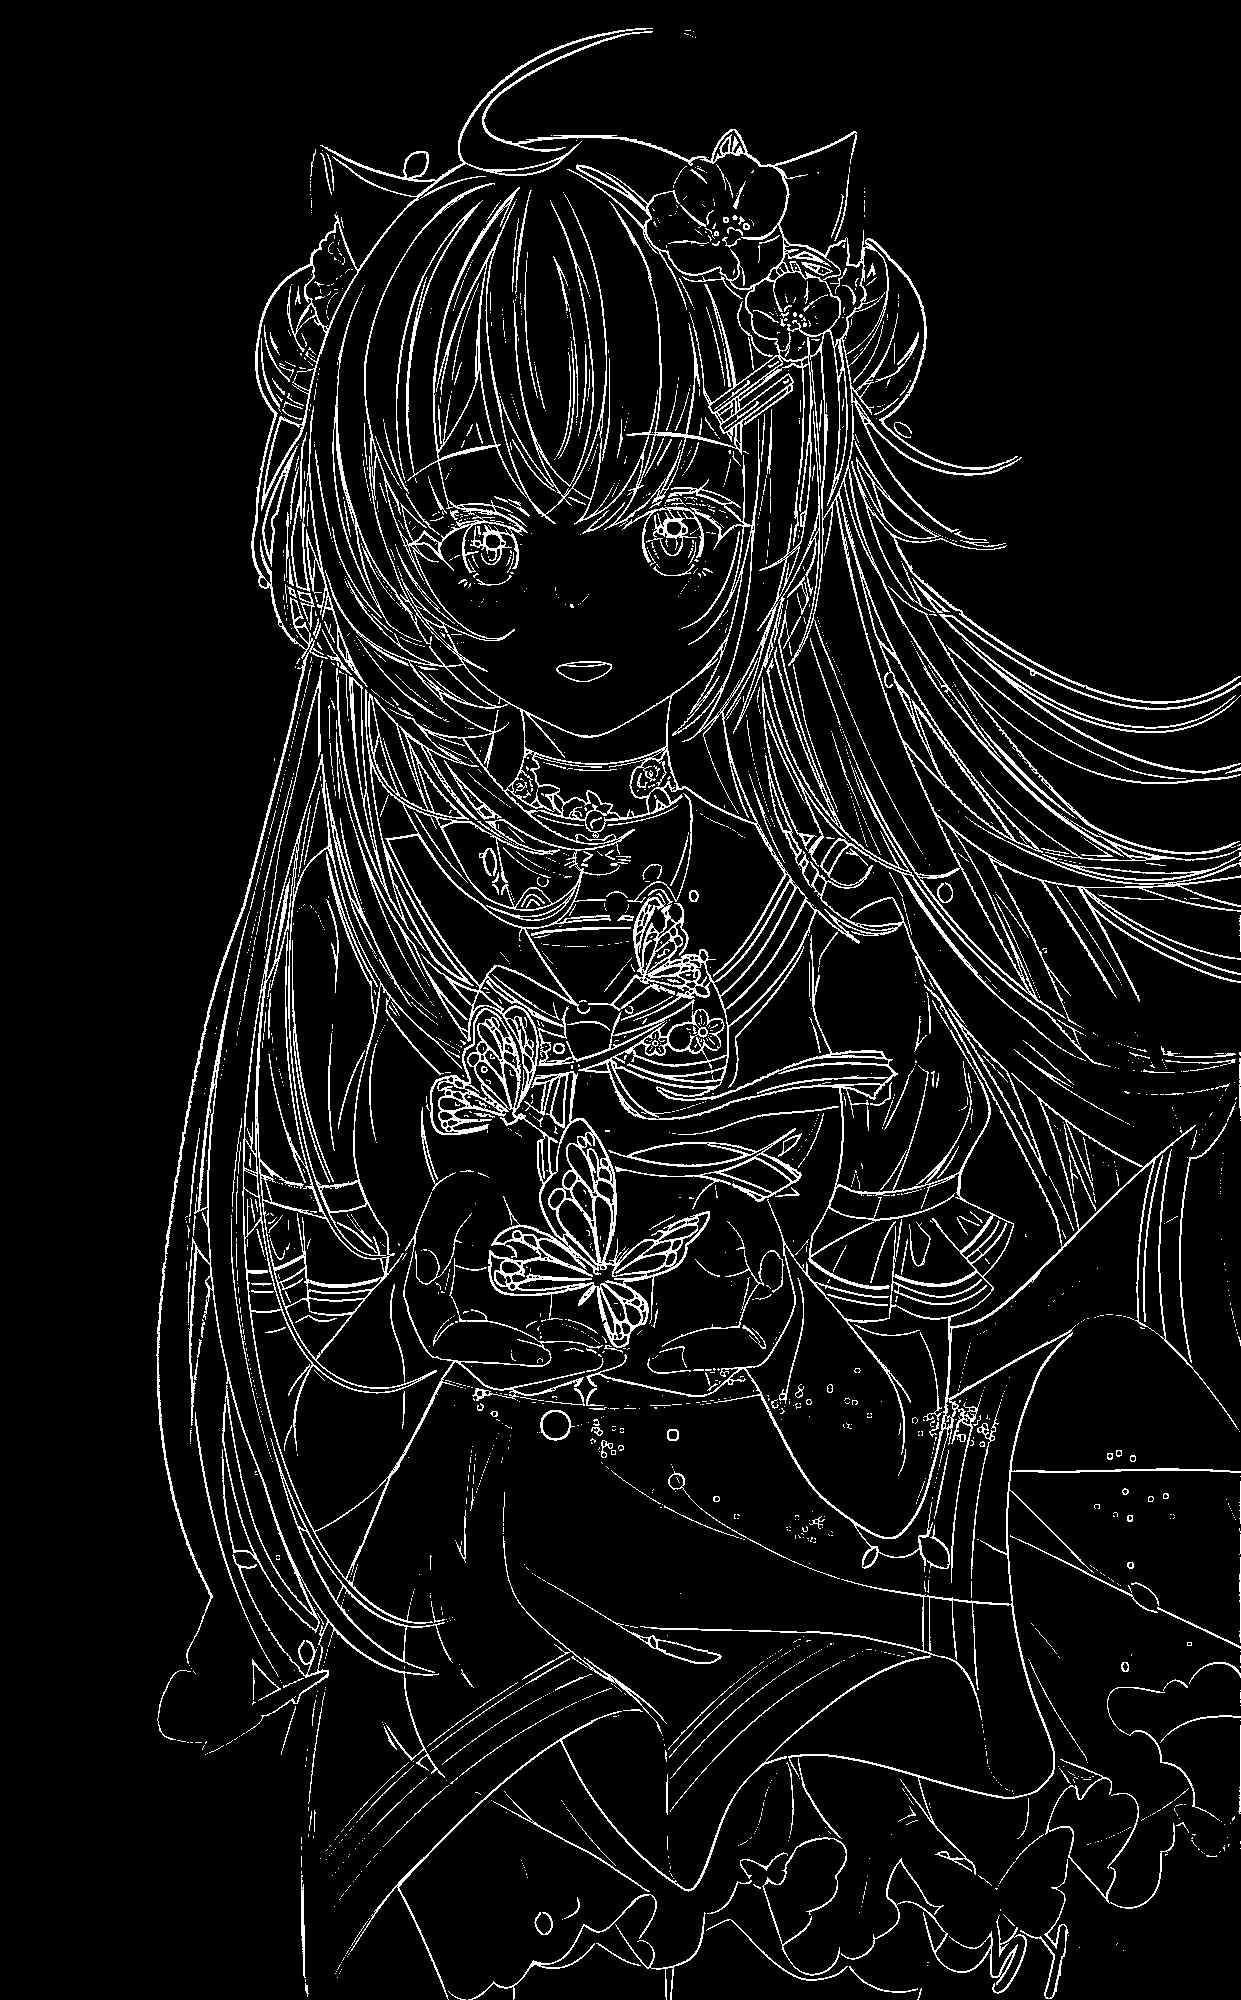

In [21]:
Image.eval(Image.fromarray(image_gray).convert("RGB"), lambda x: 255 - x)

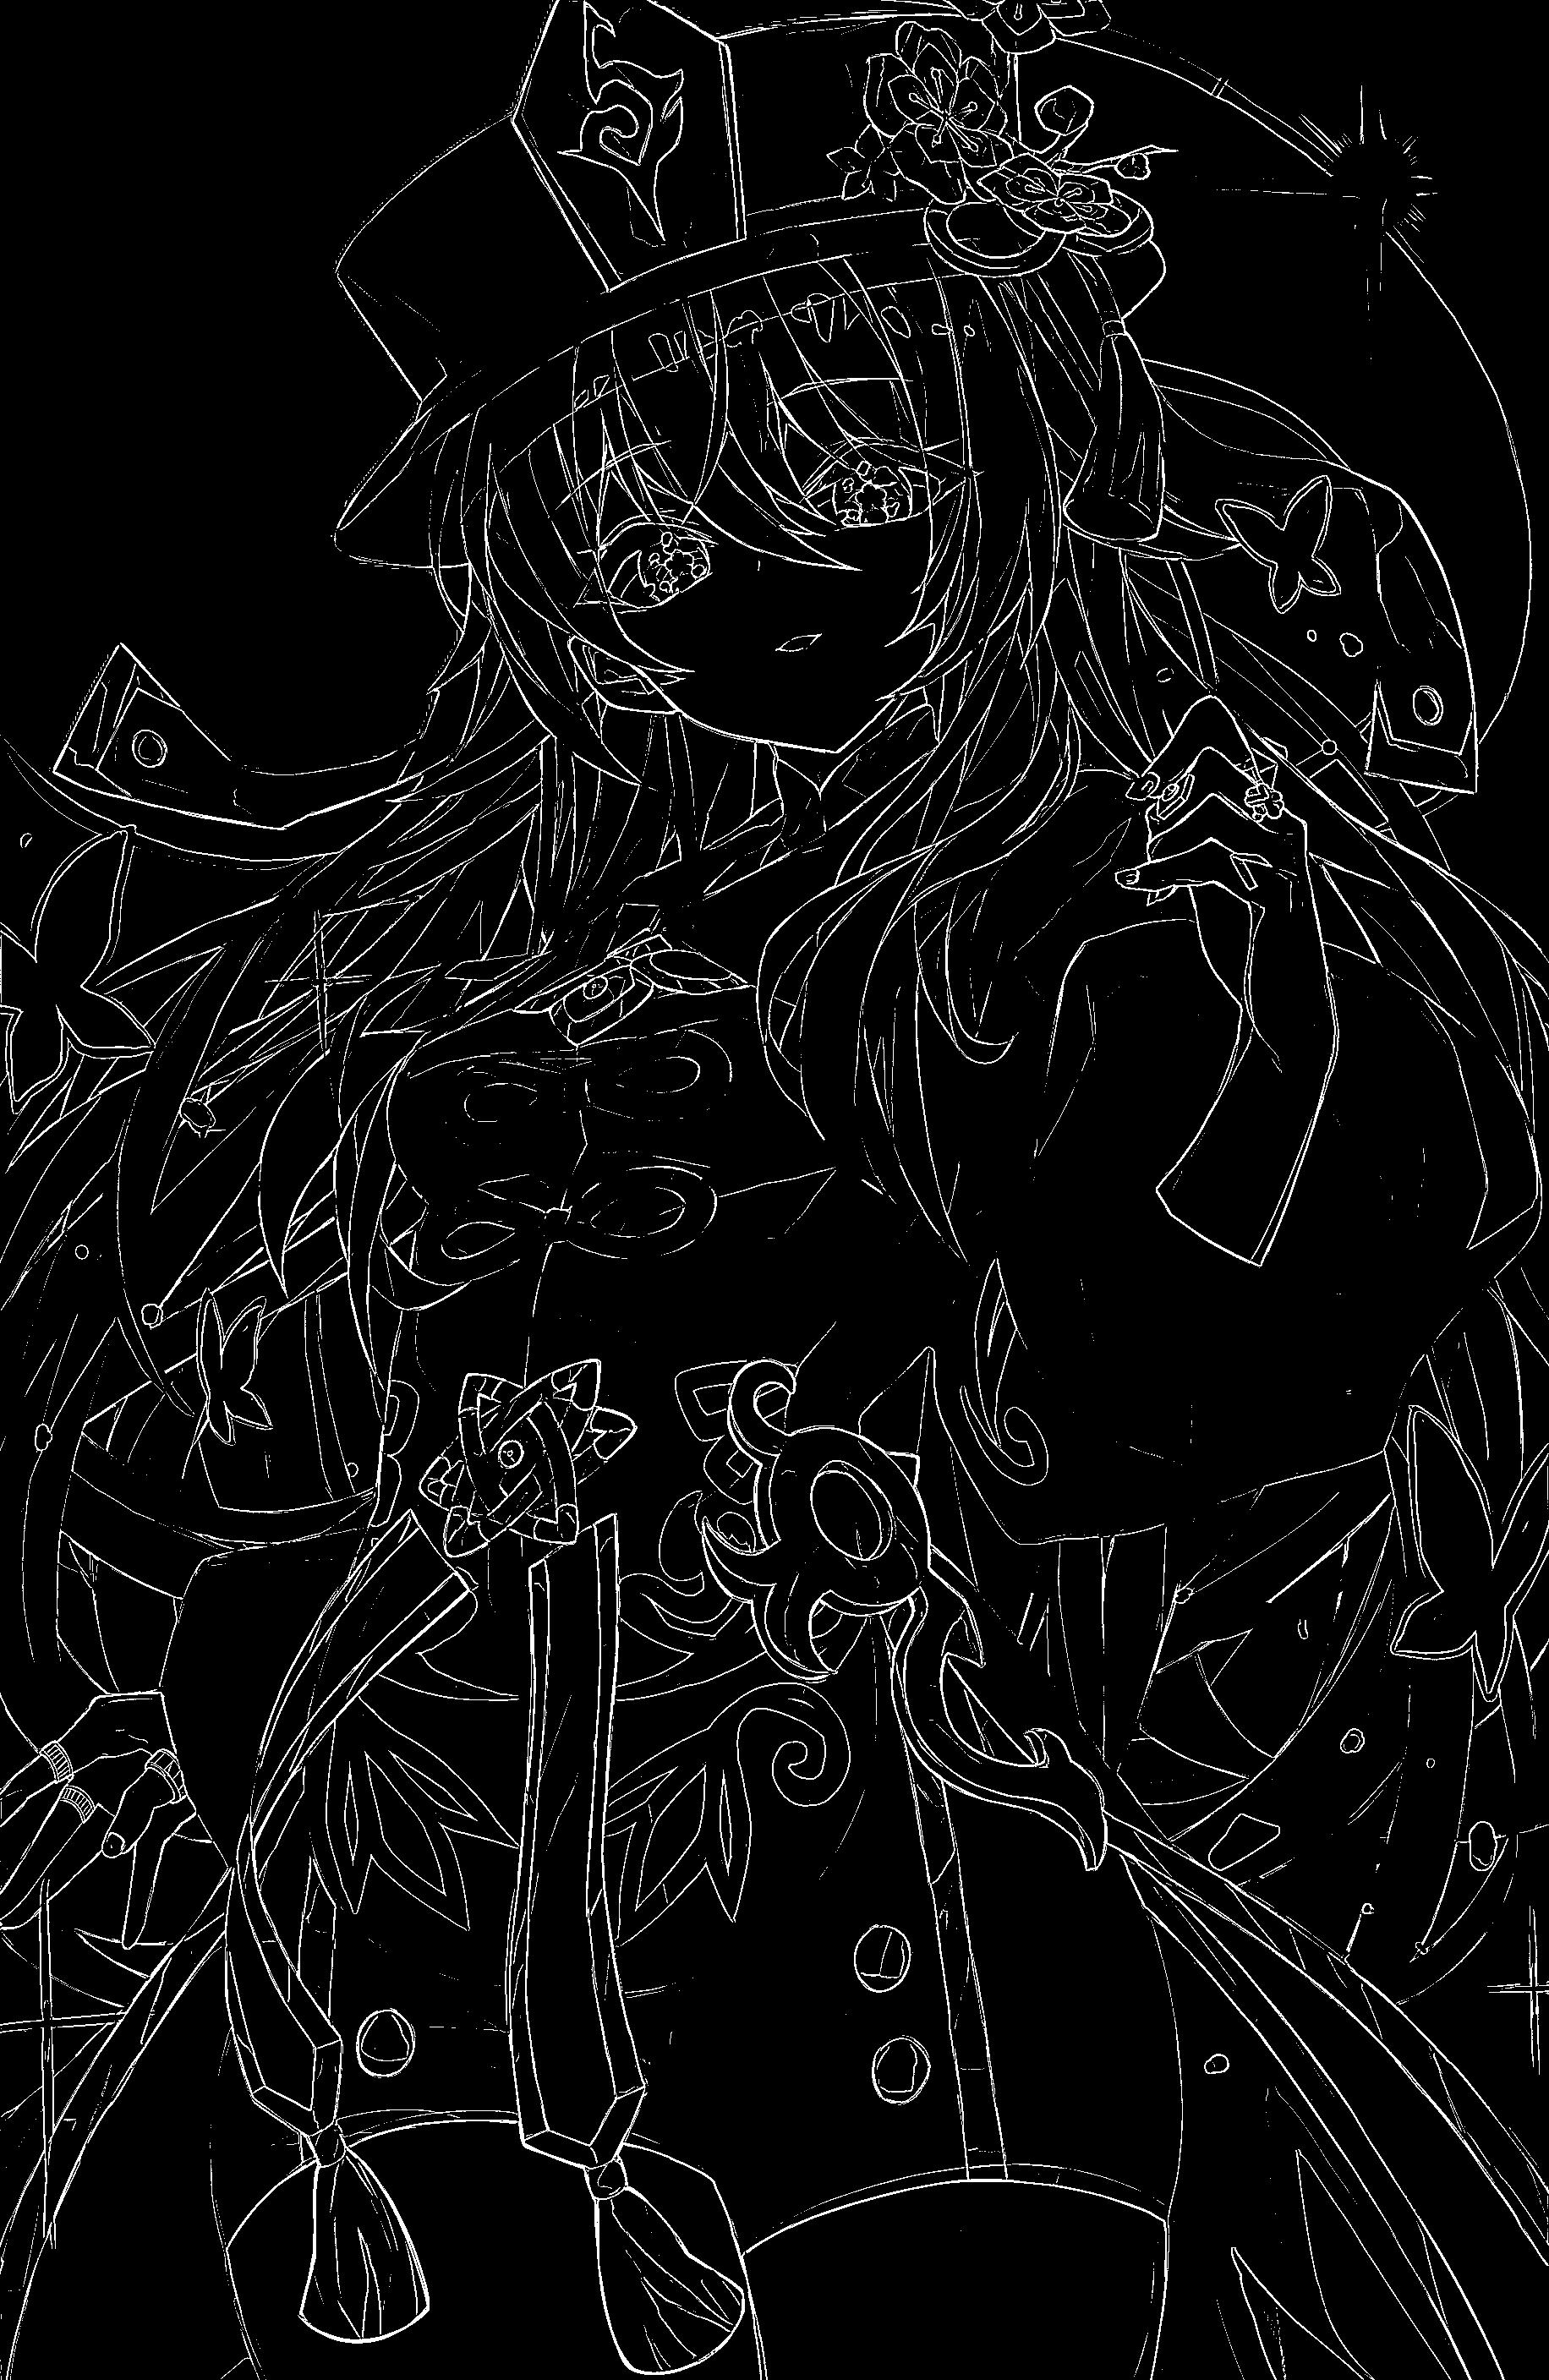

In [13]:
blueprint = Image.open(
    "/home/aihao/workspace/StableDiffusionReferenceOnly/validation_images/4/2.jpg"
).convert("RGB")
blueprint = Image.eval(blueprint, lambda x: 255 - x).convert("RGB")
blueprint

In [12]:
print(Image.fromarray(image_gray).convert("RGB") == blueprint)

ValueError: operands could not be broadcast together with shapes (2815,1832) (2815,1832,3) 